In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler


# More NLP

## Truncated Singular Value Decomposition and Dimensionality Reduction

When processing text we end up with feature sets that are large! There is up to one feature per different word in our text sample, as well as more for multi-word combinations if there are larger ngrams allowed, far larger than a typical feature set that we're used to. One thing we can do when vectorizing is just to cap the number of features we end up with, but that doesn't seem to be the most sophisticated or smartest approach. 

TSVD is one thing that we can do to chop down the feature set - or reduce the dimensions - with a little more thought. 

## Dimensionality Reduction

Dimensionality reduction is a common technique in machine learning, it does its name - reduces the dimensions in our feature data. We often want to do this for several reasons: 
<ul>
<li> To reduce the amount of time it takes to train a model.
<li> To reduce the amount of memory required to store the data.
<li> To reduce the amount of noise in the data.
<li> To make the data more interpretable.
<li> To make the data more amenable to visualization.
</ul>

# 更多自然語言處理

## 截斷奇異值分解和降維

在處理文本時，我們最終得到的特徵集很大！ 在我們的文本樣本中，每個不同的單詞最多有一個特徵，如果允許使用更大的 ngram，則多詞組合還有更多特徵，這遠大於我們習慣的典型特徵集。 矢量化時我們可以做的一件事就是限制我們最終得到的特徵數量，但這似乎不是最複雜或最聰明的方法。

TSVD 是我們可以做的一件事，可以通過更多的思考來減少特徵集——或減少維度。

## 降維

降維是機器學習中的一種常用技術，正如它的名字一樣——降低特徵數據的維度。 我們經常出於以下幾個原因想要這樣做：
<ul>
<li> 減少訓練模型所需的時間。
<li> 減少存儲數據所需的內存量。
<li> 減少數據中的噪聲量。
<li> 使數據更具可解釋性。
<li> 使數據更易於可視化。

#### Load Dataset from Last Time

We'll load the spam dataset and vectorize it with TF-IDF.

In [2]:
#Load Data
df = pd.read_csv("data/spam.csv", encoding="ISO-8859-1")
df.drop(columns={"Unnamed: 2", "Unnamed: 3", "Unnamed: 4"}, inplace=True)
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
#TF-IDF
vec_tf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,4), stop_words="english", strip_accents="unicode")
tmp = vec_tf.fit_transform(df["text"])
tok_cols = vec_tf.get_feature_names()
tok_df = pd.DataFrame(tmp.toarray(), columns=tok_cols)
print("original:", df["text"].shape)
print("vectorized:", tmp.shape)
y = df["target"]
X = df["text"]
tok_df.sample(5)

original: (5572,)
vectorized: (5572, 89635)


c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00 easter,00 easter prize,00 easter prize draw,00 sub,00 sub 16,00 sub 16 remove,00 sub 16 unsub,00 subs,00 subs 16,...,zoom cine actually,zoom cine actually tonight,zouk,zouk nichols,zouk nichols paris,zouk nichols paris free,zyada,zyada kisi,zyada kisi ko,zyada kisi ko kuch
2558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## LSA - Latent Semantic Analysis

The TSVD performs somehting called latent semantic analysis. The process of LSA and the math behind it are not something we need to explore in detail. (LSA is often called LSI - Latent Semantic Indexing). The idea of LSA is that it can generate "concepts" in the text. These concepts are found by looking at which terms occur in which documents - documents that have the same terms repeated are likely related to the same concept; other documents that share other words with those documents are likely on the same concept as well.  

An important part is the word "Latent" - i.e. the patterns detected are hidden, not explicit in the data. 

## LSA——潛在語義分析

TSVD 執行一些稱為潛在語義分析的事情。 LSA 的過程及其背後的數學原理不是我們需要詳細探討的。

LSA 通常稱為 LSI——潛在語義索引）。 LSA的思想是可以在文本中生成“概念”。 

這些概念是通過查看哪些術語出現在哪些文檔中找到的——重複具有相同術語的文檔可能與相同的概念相關； 

與這些文檔共享其他詞的其他文檔也可能在相同的概念上。

一個重要的部分是“潛在”這個詞——即檢測到的模式是隱藏的，而不是在數據中顯式的。

#### Implement SVD to Trim Dataset

We are starting with LOTS of feature inputs. Below we can loop through several models of different number of remaining components to see the accuracy depending on the number of features we keep in the feature set. The truncated part of truncated SVD trims the featureset down to the most significant features. 

We started with a lot of features - we can make predictions that are close to as accurate with far fewer, hopefully!

<b>Note:</b> this might take a long time to run, depending on your computer. Change the "for i in range()" part to cut down on the number of iterations to make it run faster.

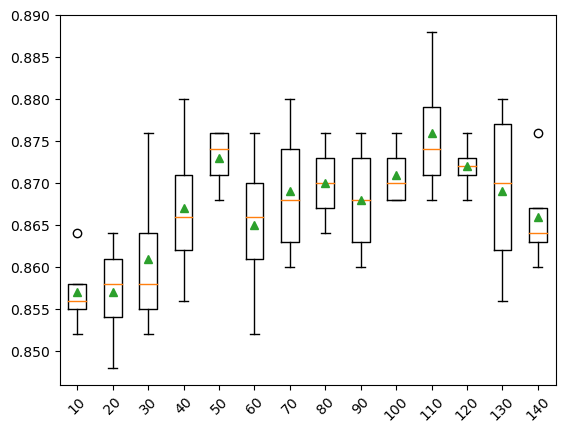

In [4]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,15):
		n = i*10
		steps = [('svd', TruncatedSVD(n_components=n)), ('m', LinearSVC(max_iter=100, tol=.01))]
		models[str(n)] = Pipeline(steps=steps)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	#Splits cut for speed
	cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, tok_df[0:1000], y[0:1000])
	results.append(scores)
	names.append(name)
# plot model performance for comparison

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

#### Prepare Datasets

In [5]:
tf_idf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3), stop_words="english", strip_accents="unicode")
tmp_vec = tf_idf.fit_transform(df["text"])

tok_cols2 = tf_idf.get_feature_names()
tmp_df = pd.DataFrame(tmp_vec.toarray(), columns=tok_cols2)


c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
print(df["text"].sample(10))

1608    Are your freezing ? Are you home yet ? Will yo...
5101            Nope thats fine. I might have a nap tho! 
3757     Lol no ouch but wish i'd stayed out a bit longer
1554                      Yeah we do totes. When u wanna?
2484    Only if you promise your getting out as SOON a...
1864                  You call him now ok i said call him
1729                   Lol yeah at this point I guess not
2710    Hope you enjoyed your new content. text stop t...
2909       How do you guys go to see movies on your side.
4951    Welcome to Select, an O2 service with added be...
Name: text, dtype: object


In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(tmp_df, y)

#### Baseline Accuracy

Since we are planning on dropping a bunch of data, we can try a model first to see what the baseline accuracy is. I'm also going to limit the number of features here, since using the entire dataset will take ages. 

In [8]:
tf_idf_base = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3), stop_words="english", strip_accents="unicode", max_features=2000)
tmp_vec_base = tf_idf_base.fit_transform(df["text"])

tok_cols2_base = tf_idf_base.get_feature_names()
tmp_df_base = pd.DataFrame(tmp_vec_base.toarray(), columns=tok_cols2_base)
X_tr_base, X_te_base, y_tr_base, y_te_base = train_test_split(tmp_df_base, y)

pipe_steps = [("scale", StandardScaler()), ("model", SVC())]
pipe_test = Pipeline(steps=pipe_steps)

pipe_test.fit(X_tr_base, y_tr_base)
pipe_test.score(X_te_base, y_te_base)

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.9619526202440776

#### Implement LSA and Model

We can use the truncated SVD to reduce the number of features in our dataset, in much the way we'd use any other data preparation step in a pipeline. 

#### 實現 LSA 和模型

我們可以使用截斷的 SVD 來減少數據集中的特徵數量，就像我們在管道中使用任何其他數據準備步驟一樣。

In [9]:
svd_tmp = TruncatedSVD(n_components=80)
pipe_steps = [("scale", StandardScaler()), ("svd", svd_tmp), ("model", SVC())]
pipe_test = Pipeline(steps=pipe_steps)

pipe_test.fit(X_tr, y_tr)
pipe_test.score(X_te, y_te)

In [ ]:
pd.DataFrame(svd_tmp.transform(X_tr))

c:\Users\Elsa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000211,-0.000159,-0.000228,-0.000185,-0.000163,-0.000221,-0.000277,-0.000215,-0.000319,-0.000106,...,-0.001577,-0.000032,-0.000504,-0.000756,-0.001533,-0.000253,0.001000,0.000505,0.002697,-0.000680
1,-0.000210,-0.000213,-0.000315,-0.000240,-0.000248,-0.000292,-0.000439,-0.000254,-0.000344,-0.000435,...,-0.002048,-0.001105,0.000259,0.000828,0.001284,0.000622,0.001240,-0.000636,0.001016,-0.000855
2,0.000909,0.001324,0.002129,0.000183,0.000883,-0.000123,0.004945,-0.001406,0.013732,0.005316,...,0.000380,0.015491,0.039309,0.026615,0.000512,-0.017715,0.034112,0.033260,0.050616,0.029373
3,-0.000406,-0.000480,-0.000663,-0.000628,-0.000767,0.000620,-0.000370,0.000460,0.002797,-0.000154,...,0.028930,0.015672,0.028103,0.003465,0.054079,-0.004065,-0.007986,-0.022096,-0.004089,0.031915
4,-0.000128,-0.000124,-0.000160,0.002172,-0.000124,0.001447,-0.000157,-0.000151,-0.000166,-0.000168,...,0.000699,-0.000947,0.000181,-0.000460,-0.000756,-0.000923,0.002021,-0.001224,0.002820,-0.000239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,-0.000125,-0.000122,-0.000181,0.000202,-0.000128,-0.000153,-0.000243,-0.000092,-0.000219,-0.000113,...,-0.001117,-0.000475,0.000131,-0.000221,0.000493,-0.000302,0.000592,0.000779,-0.000693,-0.000270
4175,-0.000061,-0.000060,-0.000088,-0.000070,-0.000071,-0.000071,-0.000132,-0.000051,-0.000138,-0.000043,...,-0.000281,-0.000549,-0.000446,-0.001047,0.000390,0.001535,0.000723,0.000175,0.000516,0.001108
4176,0.003462,-0.000285,-0.000030,-0.000555,-0.000045,0.000141,-0.000371,-0.000172,-0.000983,-0.001722,...,-0.002786,0.008854,-0.003377,0.019004,0.013862,-0.008197,0.001502,-0.034245,-0.022086,0.017918
4177,-0.000168,-0.000162,-0.000247,-0.000199,-0.000195,-0.000160,-0.000342,-0.000148,-0.000320,-0.000322,...,0.000636,-0.002459,-0.001586,0.001833,0.000297,-0.000121,0.002744,0.001395,0.002395,-0.001878


#### LSA Results

In the second model, our feature set is far smaller, but we're still getting a very high accuracy. If the original dataset that we started with was very large, this impact would be magnified greatly. In general, NLP models use a lot of data, so this dimesionality reduction can help reduce training datasets that are massive and may even be impractical to process. 

#### LSA 結果

在第二個模型中，我們的特徵集要小得多，但我們仍然可以獲得非常高的準確性。 

如果我們開始的原始數據集非常大，這種影響會被大大放大。 

通常，NLP 模型使用大量數據，因此這種降維有助於減少海量甚至可能無法處理的訓練數據集。

##### Topics

One of the things that LSA can do is to find "topics" in the text. We can use the components of the SVD to find the most important words in each topic. A "topic" is something that is not explicitly stated in the text, but is implied by the words that are used - if we have several documents that tend to use the same words, they are likely to be about the same topic. The LSA process is able to look for these cooccuring words and the documents that contain them, and group them as being about the same topic. The mechanics of this are some matrix math that is beyond what we neeed to know, but we can picture it like this.

![LSA Math](images/lsa_math.webp "LSA Math")

The topic extraction is also an example of unsupervised learning - something we'll look at more soon with clustering. We don't provide the topics to the mode in advance like we woud with a normal classification - we just give the LSA process the data, and it figures it out on its own.

The model doesn't "understand" what each topic is, but it is able to pick up on trends of tokens that tend to occur together in documents. Text that contains "ball", "game", "football", "play", "quarterback" is likely to be about football - the model won't know it is football, but it will know that those words tend to occur together, and documetns that contain those words are likely to be about the same topic. 

＃＃＃＃＃ 主題

LSA 可以做的一件事是在文本中找到“主題”。 我們可以使用 SVD 的組件來找到每個主題中最重要的單詞。 

“主題”是文本中未明確說明的內容，但被所使用的詞語所暗示——如果我們有幾份文檔傾向於使用相同的詞語，那麼它們很可能是關於同一主題的。 

LSA 過程能夠查找這些同時出現的詞和包含它們的文檔，並將它們分組為關於同一主題。 

它的機制是一些矩陣數學，超出了我們需要知道的範圍，但我們可以這樣描繪它。

主題提取也是無監督學習的一個例子——我們很快就會通過聚類來了解這一點。 

我們不會像正常分類那樣提前向模式提供主題——我們只是給 LSA 處理數據，它會自己計算出來。

該模型不“理解”每個主題是什麼，但它能夠了解文檔中往往一起出現的標記趨勢。 

包含“ball”、“game”、“football”、“play”、“quarterback”的文本很可能是關於足球的——模型不知道這是足球，但它會知道這些詞往往一起出現 , 並且包含這些詞的文檔很可能是關於同一主題的。

In [ ]:
for index, component in enumerate(svd_tmp.components_):
    zipped = zip(tok_cols2, component)
    top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:6]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic:"+str(index)+" ", top_terms_list)

Topic:0  ['amp imf', 'amp imf loan', 'bank amp', 'bank amp imf', 'bank directors', 'bank directors says']
Topic:1  ['gt good', 'lt gt good', 'aaniye', 'aaniye pudunga', 'aaniye pudunga venaam', 'athletic']
Topic:2  ['boost secret', 'boost secret energy', 'cn', 'secret energy', '2gthr', '2gthr drinking']
Topic:3  ['breath', 'curry', 'named', 'planet', 'love start', 'attraction']
Topic:4  ['bajarangabali', 'bajarangabali maruti', 'bajarangabali maruti pavanaputra', 'dodda', 'dodda problum', 'dodda problum nalli']
Topic:5  ['ur cell', '4wrd', '4wrd dear', '4wrd dear loving', 'abt events', 'abt events espe']
Topic:6  ['police', 'afternoon wife', 'afternoon wife called', 'arrested murderer', 'arrested murderer immediately', 'called police']
Topic:7  ['academic', 'department', 'academic department', 'academic department tell', 'academic secretary', 'academic secretary current']
Topic:8  ['shahjahan', 'killed', 'mumtaz', '4th wife', '4th wife wifes', 'arises']
Topic:9  ['1stone', '1stone sun'

### Exercise - Truncated SVD

Try to use the same text for predictions from the newsgroups last time. Try to use the TSVD with a limited number of components and see if the accuracy can stay similar to what we got last time. 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
remove = ("headers", "footers", "quotes")
categories = ["alt.atheism", "talk.religion.misc"]

data_train = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42, remove=remove)

data_test = fetch_20newsgroups(
    subset="test", categories=categories, shuffle=True, random_state=42, remove=remove)

##### Vectorize and Prep Data

In [ ]:
# Vectorize and prep datasets
news_tf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,4), stop_words="english", strip_accents="unicode")
X_train = news_tf.fit_transform(data_train.data)
y_train = data_train.target
X_test = news_tf.transform(data_test.data)
y_test = data_test.target
print("Train (x,y):", X_train.shape, "  Test (x,y):", X_test.shape)

Train (x,y): (857, 226373)   Test (x,y): (570, 226373)


##### Create Models

In [ ]:
# Create Models
tsvd = TruncatedSVD(n_components=20)
news_steps = [("scale", StandardScaler()), ('svd', tsvd), ('m', RandomForestClassifier())]
news_model = Pipeline(steps=news_steps)
news_model.fit(X_train, y_train)
news_model.score(X_test, y_test)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

##### Look at the Topics

We can also take a look at what the topics identified in the data are. 

In [ ]:
terms = news_tf.get_feature_names()
topics = []
for index, component in enumerate(tsvd.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

/Users/akeems/opt/anaconda3/envs/ml3950/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0:  ['ico', 'ico tek', 'ico tek com', 'vice ico', 'vice ico tek']
Topic 1:  ['just', 'god', 'people', 'don', 'think']
Topic 2:  ['cobb', '3rd debate', '3rd debate cobb', '3rd debate cobb alexia', 'champaign urbana']
Topic 3:  ['mom', 'men', 'isc', 'isc rit', 'isc rit edu']
Topic 4:  ['freewill', 'angels freewill', 'angels freewill god', 'angels freewill god tells', 'freewill god']
Topic 5:  ['deletion', 'alt atheism', 'argument', 'alt', 'atheism']
Topic 6:  ['deletion', 'ra', 'mcconkie', 'lds', 'mormon']
Topic 7:  ['start', 'just', 'deletion', 'hand', 'account smile']
Topic 8:  ['context', 'quote context', 'quotes context', 'jim', 'quote']
Topic 9:  ['messenger', 'koresh', 'carried says', 'carried says character', 'carried says character messenger']
Topic 10:  ['washed', 'washed blood', 'bull', 'blood', 'lamb']
Topic 11:  ['said surrender', 'surrender', 'didn', 'rb', 'broadcast message']
Topic 12:  ['rb', 'young', 'preying', 'preying young', 'altar boy']
Topic 13:  ['god', 'jesus

### LSA Results

Using LSA is a good way to condense our feature set that is often extremely large and extremely sparse, especially when we are dealing a large dataset, as is common with NLP. 

Simple applications in which this technique is used are documented clustering in text analysis, recommender systems, and information retrieval. More detailed use-cases of topic modeling are:
<ul>
<li> <b>Resume Summarization:</b> It can help recruiters to evaluate resumes by a quick glance. They can reduce effort in filtering pile of resume.
<li> <b>Search Engine Optimization:</b> online articles, blogs, and documents can be tag easily by identifying the topics and associated keywords, which can improve optimize search results.
<li> <b>Recommender System Optimization:</b> recommender systems act as an information filter and advisor according to the user profile and previous history. It can help us to discover unvisited relevant content based on past visits.
<li> <b>Improving Customer Support:</b> Discovering relevant topics and associated keywords in customer complaints and feedback for examples product and service specifications, department, and branch details. Such information help company to directly rotated the complaint in respective department.
<li> <b>Healthcare Industry:</b> topic modeling can help us to extract useful and valuable information from unstructured medical reports. This information can be used for patients treatment and medical science research purpose.
</ul>

In general, non-neural network approaches to NLP tend to be present in areas where we need to be able to process text quickly, without lots of processing. Spam filters are the classic example - we need to say yes or no, without spending ages to do so or burdening an email service with lots of processing. The examples above are similar - we are trying to draw a simple-ish conclusion. This is also somewhere that our old friend Bayes and his classifiers are most commonly seen - they are very fast at generating predictions once trained, so for something like emails, that's likely to be a good choice.

An important concept from this example is the idea of condesing multiple features down into a smaller feature set while attempting to maintain the information in the original, that is something we'll revisit with Principal Component Analysis (PCA), a similar technique that is more generally applicable, later on.

### LSA 結果

使用 LSA 是壓縮通常非常大且非常稀疏的特徵集的好方法，尤其是當我們處理大型數據集時，這在 NLP 中很常見。

使用此技術的簡單應用程序是文本分析、推薦系統和信息檢索中的記錄聚類。 主題建模的更詳細用例是：
<ul>
<li> <b>Resume Summarization：</b>它可以幫助招聘人員通過快速瀏覽來評估簡歷。 他們可以減少篩選簡歷的工作量。
<li> <b>搜索引擎優化：</b>在線文章、博客和文檔可以通過識別主題和相關關鍵字輕鬆標記，從而改進優化搜索結果。
<li> <b>推薦系統優化：</b>推薦系統根據用戶個人資料和以前的歷史充當信息過濾器和顧問。 它可以幫助我們根據過去的訪問發現未訪問過的相關內容。
<li> <b>改善客戶支持：</b>在客戶投訴和反饋中發現相關主題和相關關鍵字，例如產品和服務規格、部門和分支機構詳細信息。 這些信息幫助公司直接將投訴轉移到各個部門。
<li> <b>醫療保健行業</b>：主題建模可以幫助我們從非結構化醫療報告中提取有用且有價值的信息。 此信息可用於患者治療和醫學科學研究目的。
</ul>

一般來說，NLP 的非神經網絡方法往往出現在我們需要能夠快速處理文本而不需要大量處理的領域。 

垃圾郵件過濾器就是一個典型的例子——我們需要說是或否，而不需要花費很長時間來做這件事或者給電子郵件服務增加大量處理的負擔。

上面的例子很相似——我們試圖得出一個簡單的結論。 這也是我們的老朋友貝葉斯和他的分類器最常見的地方——

一旦經過訓練，它們生成預測的速度非常快，所以對於像電子郵件這樣的東西，這可能是一個不錯的選擇。

這個例子中的一個重要概念是將多個特徵壓縮成一個較小的特徵集，同時試圖保持原始信息，

這是我們將使用主成分分析 (PCA) 重新審視的東西，一種類似的技術更 一般適用，稍後再說。

## Word2Vec and Classification

In addition to calculating things solely directly from our data, we can also use some external tools that can help create embeddings that are a little better (hopefully). This is also a neural network running behind the scenes to help us out. Word2Vec is an algorithm made by Google that can help process text and produce embeddings. Word2Vec looks for associations of words that occur with each other. This is an excellent illustrated description of Word2Vec: https://jalammar.github.io/illustrated-word2vec/

### Word2Vec in Process

Word2Vec generates its embeddings by looking at words in a sentence, and the surrounding words in that same sentence. This differs quite a bit from the data that we've generated with the vectorization, as this model is better able to capture the strutucre of a sentence, beyond only looking at the individual words. We will use word2vec for a couple of different things:
<ul>
<li> Primarily, we'll use word2vec in a "two model" sequence to set us up to do classifications. The word2vec model will replace the count/tf-idf scores that we previously used for our feature set with embeddings that it calculates as the w2v model trains. The w2v model is "learning" how to represent words with numbers, in this case dimensions in a multidimensional space.
    <ul>
    <li> The w2v training is what creates the N-dimension measurements of each token, those then feed into our feature set for our modelling. 
    </ul>
<li> After the word2vec model is created, we can do things like check the similarity of words. 
</ul>

#### Gensim

Gensim is a package that we can install that has an implementation of Word2Vec that we can use pretty easily. This part just downloads some of the stuff we'll need, like stopwords. 

## Word2Vec 和分類

除了完全直接根據我們的數據進行計算之外，我們還可以使用一些外部工具來幫助創建更好一點的嵌入（希望如此）。 

這也是一個在幕後運行的神經網絡來幫助我們。 Word2Vec 是谷歌開發的一種算法，可以幫助處理文本和生成嵌入。 

Word2Vec 尋找彼此出現的單詞的關聯。 這是對 Word2Vec 的出色說明說明：https://jalammar.github.io/illustrated-word2vec/

### Word2Vec 正在處理中

Word2Vec 通過查看句子中的單詞以及同一個句子中周圍的單詞來生成嵌入。 

這與我們通過矢量化生成的數據有很大不同，因為該模型能夠更好地捕捉句子的結構，而不僅僅是查看單個單詞。 

我們將使用 word2vec 來做一些不同的事情：
<ul>
<li> 首先，我們將在“雙模型”序列中使用 word2vec 來設置我們進行分類。 

word2vec 模型將用它在 w2v 模型訓練時計算的嵌入替換我們之前用於特徵集的計數/tf-idf 分數。 

w2v 模型正在“學習”如何用數字表示單詞，在這種情況下是多維空間中的維度。
     <ul>
     <li> w2v 訓練是為每個標記創建 N 維測量的原因，然後將這些測量輸入到我們的建模特徵集中。
     </ul>
<li> 創建 word2vec 模型後，我們可以做一些事情，比如檢查單詞的相似度。
</ul>

#### 基因模擬

Gensim 是一個我們可以安裝的包，它有一個我們可以很容易使用的 Word2Vec 實現。 

這部分只是下載一些我們需要的東西，比如停用詞。

In [ ]:
from gensim.models import Word2Vec
import nltk
nltk.download('omw-1.4')

for package in ['stopwords','punkt','wordnet']:
    nltk.download(package) 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Tokenizer

Since we are not using the vecorizer from sklearn, we need to provide our own tokenization. We can use the nltk based one from last time. We can also do any other types of processing here that we may want - stemming, customized stop words, etc... For this one I chopped out any 1 character tokens and added a regex filter to get rid of punctuation. 

### 分詞器

由於我們沒有使用 sklearn 中的 vecorizer，因此我們需要提供自己的標記化。 我們可以使用上次的基於 nltk 的。 

我們還可以在這裡進行我們可能想要的任何其他類型的處理——詞幹提取、自定義停用詞等……對於這個，我切掉了任何 1 個字符的標記，並添加了一個正則表達式過濾器來去除標點符號。

In [ ]:
class lemmaTokenizer(object):
    def __init__(self, stop_words):
        self.stop_words = stop_words
        from nltk.stem import WordNetLemmatizer
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        filtered_tok = []
        for tok in tokens:
            if tok not in stop_words:
                tok = re.sub('\W+','', tok) #Punctuation strip
                tmp = self.lemmatizer.lemmatize(tok)
                if len(tmp) >= 2:
                    filtered_tok.append(tmp)
        return filtered_tok

### Create Clan Text - Tokenize and Lemmatize

Prep some data. The "second half" of the dataframe is what we can use with the Word2Vec prediction models - we have cleaned up lists of tokens as well as translating the targets to 1 and 0. 

In [ ]:
tok = lemmaTokenizer(stop_words)
df["clean_text"] = df["text"].apply(lambda x: tok(x))
df["target2"] = pd.get_dummies(df["target"], drop_first=True)
df.head()

,target,text,clean_text,target2
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, g...",0
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, oni]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, wkly, comp, win, FA, Cup, final,...",1
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, already, say]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, nt, think, go, usf, life, around, though]",0


### Create Word2Vec Ebmeddings

Now comes the word2vec model - instead of taking our clean data and counting it to extract features, we can train our Word2Vec model with our cleaned up data and the output of that model is our set of features. This will have Word2Vec do its magic behind the scenes and perform the training. W2V works in one of two ways, which are roughly opposites of each other, when doing this training:
<ul>
<li> Continuous Bag of Words: looks at a window around each target word to try to predict surrounding words.
<li> Skip-Gram: looks at words surrounding target to try to predict it. 
</ul>

We'll revisit the details of some of this stuff later on when we look at neural networks, since W2V is a neural network algorithm, it will make more sense in context. 

<b>Note:</b> this training is not making a model that we are using to make predictions. This is training inside the W2V algorithm to generate representations of our tokens. 

#### Embeddings

The embeddings that we are generating are vectors that represent the words in our text. We can look at the embeddings for a word to see what they look like, but they aren't comprehensible to humans. Our count vectors or the td-idf calculations we made previously are also embeddings, those are just far more simple. Word2Vec will generate embeddings that attempt to group words that are similar together in multidimensional space. We can look at a simple example in 2D:

![Similarity](images/similarity.png "Similarity")

The values here aren't calculated, they are chosen arbitrarily, but each word is represented here in two dimensions - x and y. Words that are similar in meaning should be close to each other in the vector representation, such as "King" and "Queen". Words that are not similar should be far apart, such as "King" and "Rutabaga". The embeddings that word2vec will generate from our data as a result of the training below will aim to represent each word in 200 dimension space. We feed the word2vec model our tokens, and it will generate a N-dimension vector for each token. We can use comparisons in this N dimensional space to determine how similar two words are. 

### 創建 Word2Vec Ebmeddings

現在出現了 word2vec 模型——我們可以用我們清理過的數據訓練我們的 Word2Vec 模型，而不是使用我們乾淨的數據併計算它來提取特徵，並且該模型的輸出是我們的特徵集。 

這將使 Word2Vec 在幕後施展魔法並執行訓練。 在進行此訓練時，W2V 以兩種方式之一工作，這兩種方式大致相反：
<ul>
<li> 連續詞袋：查看每個目標詞周圍的窗口以嘗試預測周圍的詞。
<li> Skip-Gram：查看目標周圍的詞以嘗試預測它。
</ul>

稍後當我們研究神經網絡時，我們將重新審視其中一些細節，因為 W2V 是一種神經網絡算法，它在上下文中會更有意義。

<b>注意：</b> 此訓練並未製作我們用來進行預測的模型。 這是在 W2V 算法內部進行訓練，以生成我們的令牌表示。

#### 嵌入

我們生成的嵌入是表示文本中單詞的向量。 我們可以查看單詞的嵌入以了解它們的外觀，但人類無法理解它們。 

我們之前進行的計數向量或 td-idf 計算也是嵌入，只是簡單得多。 Word2Vec 將生成嵌入，試圖將多維空間中相似的單詞組合在一起。 

這裡的值不是計算出來的，它們是任意選擇的，但是每個詞在這里以二維 - x 和 y 表示。 

意思相近的詞在向量表示中應該靠得很近，比如“King”和“Queen”。 不相近的詞要相距遠，如“王”、“大頭菜”。 

作為下面訓練的結果，word2vec 將從我們的數據生成的嵌入旨在表示 200 維空間中的每個單詞。 我們向 word2vec 模型提供我們的標記，它會為每個標記生成一個 N 維向量。 

我們可以在這個 N 維空間中使用比較來確定兩個詞的相似程度。

In [ ]:
# import required modules
import inspect
  
# use signature()
print(inspect.signature(Word2Vec))

(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)


### Word2Vec Model Architecture

We've mentioned that the word2vec model we are making is a neural network. Neural networks, as we'll see later, have an architecture, or basically a size and design. The details don't matter too much to us yet, but one thing that we can change when determing our model in word2vec is that architecture - we can choose between CBOW and Skip-Gram. These two options are roughly opposites of each other. The details of how they work and how they differ are neural network details, so we'll set those details aside for now.

我們已經提到我們正在製作的 word2vec 模型是一個神經網絡。 正如我們稍後將看到的，神經網絡具有架構，或者基本上具有尺寸和設計。 

細節對我們來說還不太重要，但是在確定 word2vec 模型時我們可以改變的一件事是架構——我們可以在 CBOW 和 Skip-Gram 之間進行選擇。 

這兩個選項大致相反。 它們如何工作以及它們有何不同的細節是神經網絡的細節，所以我們暫時把這些細節放在一邊。

<b>Continuous Bag of Words</b></br>
![CBOW](images/cbow.webp "CBOW")

<b>Skip-gram</b><br>
![Skip-Gram](images/skip_gram.webp "Skip-Gram")

These two models look like mirror images of each other, but what do they mean? Each does the same thing, though in a slightly different way. 
<ul>
<li> CBOW: looks at a window around each target word to try to predict surrounding words.
<li> Skip-Gram: looks at a word and tries to predict the surrounding words.
</ul>

For us, we can ignore the details of the differnece and think of the two options similarly to other options like regularization or entropy/gini. The way the internal neural network learns is different in the different architectures. 

#### Which to Use?

For the most part, the real answer is our favorite one - test and choose the best. In general:
<ul>
<li> Skip Gram tends to work well with small amount of data and is found to represent rare words well.
<li> CBOW is normally faster and has better representations for more frequent words.
</ul>

Parameters other than the ones we have listed here can be tweaked, but we'll somewhat ignore them for now, we're ok with the defaults. The "sg" parameter is the one that controls the architecture - 1 is skip-gram, 0 is CBOW.

這兩個模型看起來像是彼此的鏡像，但它們是什麼意思呢？ 每個人都做同樣的事情，儘管方式略有不同。
<ul>
<li> CBOW：查看每個目標詞周圍的窗口以嘗試預測周圍的詞。
<li> Skip-Gram：查看一個詞並嘗試預測周圍的詞。
</ul>

對我們來說，我們可以忽略差異的細節，並以類似於正則化或熵/基尼等其他選項的方式來考慮這兩個選項。 

內部神經網絡的學習方式在不同的架構中是不同的。

#### 使用哪個？

在大多數情況下，真正的答案是我們最喜歡的答案——測試並選擇最好的。 一般來說：
<ul>
<li> Skip Gram 往往適用於少量數據，並且被發現可以很好地表示稀有詞。
<li> CBOW 通常更快並且對更頻繁的詞有更好的表示。
</ul>

我們在這裡列出的參數以外的參數可以調整，但我們暫時忽略它們，我們可以使用默認值。 

“sg”參數是控制架構的參數——1 是 skip-gram，0 是 CBOW。

In [ ]:
# create Word2vec model
model = Word2Vec(df['clean_text'],min_count=3, vector_size=200, sg=1)
#min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it

#combination of word and its vector
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

### Word2Vec Model

Each word in the vocabulary now has a vector representing it - of size 200. We can make a dataframe and see each token in our text and its vector representation. This vector is the internal representation of each token that is generated by Word2Vec. This is how the algorithm calculates things like similarity...

The word2vec result that we are printing out here is each word in our vocabulary and its vector representation - or all of its dimensions in the 200D space we created while the model was trained. 

### Word2Vec 模型

詞彙表中的每個單詞現在都有一個表示它的向量——大小為 200。我們可以製作一個數據框並查看文本中的每個標記及其向量表示。 

該向量是 Word2Vec 生成的每個標記的內部表示。 這就是算法如何計算相似度之類的東西......

我們在這裡打印出的 word2vec 結果是我們詞彙表中的每個單詞及其向量表示 - 或者我們在訓練模型時創建的 200D 空間中的所有維度。

In [ ]:
tmp = pd.DataFrame(w2v)
vectors = model.wv
tmp

,call,nt,get,gt,lt,ur,You,go,know,like,...,community,88039,SkilGme,meetin,ti,anywhere,opening,diff,living,boye
0,0.148444,0.063375,0.067295,0.016624,-0.022945,0.114367,0.085709,0.064109,0.063963,0.054185,...,0.040629,0.041977,0.037886,0.050819,0.048504,0.024622,0.029028,0.045932,0.037331,0.044939
1,-0.038233,-0.004675,-0.027695,-0.091960,-0.052563,-0.062537,-0.041445,0.008905,-0.032066,-0.029308,...,-0.020359,-0.019174,-0.018625,-0.018485,-0.018153,-0.009105,-0.013288,-0.015207,-0.015266,-0.018489
2,0.091548,0.017172,0.053989,0.255615,0.270400,0.097066,0.066605,0.028013,0.042960,0.073416,...,0.032520,0.048582,0.038207,0.048829,0.037020,0.024018,0.024956,0.041867,0.039022,0.043074
3,0.161302,0.074408,0.107433,0.365333,0.379281,0.037254,0.053775,0.046690,0.063166,0.104828,...,0.028579,0.036919,0.030299,0.043386,0.032707,0.017042,0.027508,0.033105,0.027924,0.034405
4,0.184827,0.132882,0.165953,0.323456,0.349884,0.183901,0.156966,0.135485,0.144360,0.166430,...,0.079263,0.097863,0.070170,0.102670,0.088945,0.051913,0.063504,0.087912,0.079552,0.081643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.104215,0.063988,0.070005,-0.079753,-0.066267,0.085028,0.071899,0.122864,0.071898,0.053523,...,0.030069,0.038823,0.031893,0.046448,0.038981,0.027305,0.028290,0.044103,0.033981,0.038333
196,0.042627,0.084556,0.052244,-0.127450,-0.139348,0.067103,0.081465,0.088400,0.068133,0.037919,...,0.026394,0.034827,0.022689,0.031278,0.032232,0.022935,0.026195,0.033230,0.033431,0.026697
197,-0.336169,-0.099395,-0.166457,-0.276381,-0.241740,-0.240602,-0.201684,-0.077809,-0.132518,-0.115541,...,-0.087906,-0.114379,-0.087989,-0.112439,-0.106283,-0.065522,-0.073919,-0.108034,-0.094705,-0.103644
198,-0.172427,-0.054020,-0.033489,0.218018,0.189746,-0.105011,-0.104539,-0.047957,-0.056027,-0.005327,...,-0.036832,-0.044260,-0.028509,-0.044625,-0.046171,-0.025418,-0.025121,-0.041894,-0.037110,-0.039461


## Using Similarity

One of the things that Word2Vec allows us to do is to look at the similarity of words. This similarity is calculated via the cosine distance of the vectors. Cosine similarity is a technique to calculate the distance between two vectors - smaller distance, more similar. 

![Cosine Similarity](images/cosine_sim.png "Cosine Similarity" )

Once the vectors are derived by in the training process, these similarity calculations are pretty easy and quick. 

<b>Note:</b> the similarites here are calculated by the values derived from our trained model. So they are based on the relationships in our text. Word2Vec and other NLP packages also commonly have pretrained models that can be downloaded that are based on large amounts of text. Words may be represented very differently in those vs whatever we train here - the more data we have, the more consistent they'll be; the more "unique" our text is, the more different it will be. If we were, for example, working in a specific domain such as patent law, we could use a large amount of patent law text to train a model that would be more consistent with our domain. Or, perhaps more likely, we could use a pretrained model that has been created with massive amounts of training data. 

### Types of Similarity

When looking at the similarity of different words, we can measure that similarity in a couple of ways - lexical and semantic, that we mentioned before. Here, the model is looking at semantic similarity, the "meaning" of each word, in the context of our text, is being compared and the most similar words are returned. Note that we can only calculate similarity here for words that we have in our vocabulary. This is one place where large language models like chat GPT have a massive advantage, their vocabulary is huge. 

<b>注意：</b> 此處的相似度是根據我們經過訓練的模型得出的值計算得出的。 所以它們是基於我們文本中的關係。 

Word2Vec 和其他 NLP 包通常還具有可以下載的基於大量文本的預訓練模型。 

這些詞與我們在這裡訓練的任何詞的表示可能非常不同——我們擁有的數據越多，它們就越一致； 我們的文本越“獨特”，它就會越不同。 

例如，如果我們在專利法等特定領域工作，我們可以使用大量專利法文本來訓練與我們的領域更一致的模型。 

或者，更有可能的是，我們可以使用使用大量訓練數據創建的預訓練模型。

### 相似度類型

在查看不同單詞的相似性時，我們可以通過兩種方式來衡量這種相似性——我們之前提到的詞彙和語義。 

在這裡，模型正在查看語義相似性，比較文本上下文中每個單詞的“含義”，並返回最相似的單詞。 

請注意，我們只能在此處計算詞彙表中單詞的相似度。 這是像聊天 GPT 這樣的大型語言模型具有巨大優勢的地方，它們的詞彙量很大。

In [ ]:
#Find the most similar word to anything in our vocabulary 
vectors.most_similar("know")[0:3]

[('want', 0.9961519837379456),
 ('ca', 0.9947837591171265),
 ('thing', 0.9945001602172852)]

In [ ]:
# We can also see how similar different words are. 
# I will grab two arbitrary words from the vocabulary and see how similar they are.
# you could use anything in the vocabulary here, try some other ones!

word_a = tmp.columns[30]
word_b = tmp.columns[40]

print(word_a, word_b)
print(vectors.similarity(word_a, word_b))

Do ok
0.9721367


### Make Predictions

We can take our actual data now and transform it through the Word2Vec model that we've made. This will generate our smaller feature set that we can build our models from, one of the things that the MeanEmbeddingVectorizer does is to collapse the data down to those 200 dimensions in the vector. Our dataset is spit out the other end, each row of text is now represented by a single vector of those 200 dimensions of our embedding values from the word2vec model (the columns).

<b>Note:</b> if this is confusing, please ignore it, this is a bit of a tangent. The meanembeddingvectorizer thing is needed to "flatten" our data down from 200D to 1D for each token. This is because our models can only dal with data that is in that format (instances x features). We can't have a 200D vector for each token, we need to collapse it down to a single value. Later, when we look at neural networks, we'll see models with differnet architectures that can accomadate data that is multidimensional like this. That's one of the reasons that neural networks are so powerful, they can accomadate data that is multidimensional, so something like an image can be treated like an image, not just a bunch of pixels.

＃＃＃ 作出預測

我們現在可以獲取實際數據並通過我們製作的 Word2Vec 模型對其進行轉換。 

這將生成我們可以從中構建模型的更小的特徵集，MeanEmbeddingVectorizer 所做的其中一件事是將數據折疊到向量中的 200 個維度。 

我們的數據集從另一端吐出，每行文本現在由來自 word2vec 模型（列）的嵌入值的那 200 個維度的單個向量表示。

<b>注意：</b>如果這讓您感到困惑，請忽略它，這有點離題。 需要 meanembeddingvectorizer 東西來將每個標記的數據從 200D“扁平化”到 1D。 

這是因為我們的模型只能處理那種格式的數據（實例 x 特徵）。 我們不能為每個標記都有一個 200D 向量，我們需要將它折疊成一個值。 

稍後，當我們研究神經網絡時，我們會看到具有不同網絡架構的模型可以容納像這樣的多維數據。 

這就是神經網絡如此強大的原因之一，它們可以容納多維數據，所以像圖像這樣的東西可以像圖像一樣對待，而不僅僅是一堆像素。

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Split data - using the new dataframe parts that we cleaned up. 
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"],df["target2"])

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)

X_train_vectors_w2v = modelw.transform(X_train)
X_test_vectors_w2v = modelw.transform(X_test)
print(X_train_vectors_w2v.shape, X_test_vectors_w2v.shape)
pd.DataFrame(X_train_vectors_w2v)

(4179, 200) (1393, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.067330,-0.031478,0.070907,0.078295,0.158155,-0.123093,-0.087629,0.210541,-0.034585,0.125569,...,0.097020,-0.078663,-0.034641,-0.016192,0.135933,0.066504,0.046844,-0.170139,-0.054585,-0.018949
1,0.072015,-0.020641,0.058071,0.075310,0.146229,-0.117535,-0.086293,0.220376,-0.025747,0.114096,...,0.103871,-0.075003,-0.047092,-0.045035,0.123453,0.080726,0.061001,-0.152627,-0.070114,-0.023008
2,0.065776,-0.019488,0.055875,0.084187,0.151737,-0.101624,-0.081254,0.245679,-0.047375,0.118113,...,0.098110,-0.058960,-0.059484,-0.056558,0.123451,0.075468,0.065698,-0.138904,-0.055643,-0.050339
3,0.073679,-0.031574,0.068011,0.062848,0.154091,-0.127947,-0.098683,0.212830,-0.026109,0.131231,...,0.109067,-0.088681,-0.032604,-0.037347,0.135932,0.076831,0.056990,-0.178684,-0.071122,-0.014774
4,0.075539,-0.028012,0.061126,0.063572,0.151786,-0.120229,-0.097460,0.228929,-0.030222,0.122837,...,0.108183,-0.075713,-0.040561,-0.053916,0.129965,0.080973,0.066813,-0.163958,-0.069962,-0.027575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0.078612,-0.029912,0.068667,0.064049,0.158875,-0.131994,-0.095947,0.219392,-0.025709,0.128633,...,0.110893,-0.087051,-0.033683,-0.036254,0.135953,0.073171,0.060425,-0.177465,-0.070211,-0.018766
4175,0.061854,-0.057025,0.072266,0.038116,0.178205,-0.154648,-0.101647,0.206305,-0.019283,0.140963,...,0.122335,-0.096665,-0.033226,-0.027986,0.124033,0.049873,0.045605,-0.184484,-0.086276,0.008379
4176,0.081061,-0.040857,0.075242,0.060781,0.164685,-0.136626,-0.105341,0.215421,-0.025633,0.136803,...,0.113703,-0.093922,-0.027959,-0.027211,0.146967,0.075703,0.056903,-0.191305,-0.074009,-0.010794
4177,0.051889,-0.039262,0.109287,0.140094,0.194180,-0.113960,-0.048785,0.235141,-0.077077,0.138319,...,0.073464,-0.066842,-0.052576,0.055743,0.164489,0.035839,0.014546,-0.182704,-0.000544,-0.038318


#### Build Model

We now have a pretty normal dataset and can use the new data to make predictions. 

AUC: 0.9839124432884692
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1194
           1       0.93      0.86      0.90       199

    accuracy                           0.97      1393
   macro avg       0.95      0.93      0.94      1393
weighted avg       0.97      0.97      0.97      1393



<AxesSubplot:>

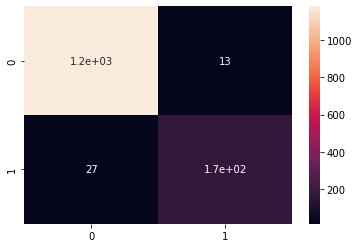

In [ ]:
# Make predictions
lr_w2v = RandomForestClassifier()
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

print(classification_report(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

## Exercise - Word2Vec

Use the newsgroup data and Word2Vec to make predictions.

In [ ]:
# Prepare datsets and Tokenize
tok = lemmaTokenizer(stop_words)
X_w2v_news_train = [tok(x) for x in data_train.data]
X_w2v_news_test = [tok(x) for x in data_test.data]

y_train_news = data_train.target
y_test_news = data_test.target

In [ ]:
# Preview
X_w2v_news_train[0]

['Benedikt',
 'Rosenau',
 'writes',
 'great',
 'authority',
 'Contradictory',
 'property',
 'language',
 'If',
 'correct',
 'THINGS',
 'DEFINED',
 'BY',
 'CONTRADICTORY',
 'LANGUAGE',
 'DO',
 'NOT',
 'EXIST',
 'object',
 'definition',
 'reality',
 'If',
 'amend',
 'THINGS',
 'DESCRIBED',
 'BY',
 'CONTRADICTORY',
 'LANGUAGE',
 'DO',
 'NOT',
 'EXIST',
 've',
 'come',
 'something',
 'plainly',
 'false',
 'Failures',
 'description',
 'merely',
 'failure',
 'description',
 'objectivist',
 'remember']

In [ ]:
# create Word2vec model
model_news = Word2Vec(X_w2v_news_train, min_count=1, vector_size=200)
w2v_news = dict(zip(model_news.wv.index_to_key, model_news.wv.vectors)) 

In [ ]:
#Word2vec
# Fit and transform
model_news_w = MeanEmbeddingVectorizer(w2v_news)
X_train_vectors_w2v_news = model_news_w.transform(X_w2v_news_train)
X_val_vectors_w2v_news = model_news_w.transform(X_w2v_news_test)

In [ ]:
# Make predictions
news_clf = SVC(probability=True)
news_clf.fit(X_train_vectors_w2v_news, y_train_news)  #model

#Predict y value for test dataset
y_predict_news = news_clf.predict(X_val_vectors_w2v_news)
y_prob_news = news_clf.predict_proba(X_val_vectors_w2v_news)[:,1]
 

print(classification_report(y_test_news,y_predict_news))
print('Confusion Matrix:\n',confusion_matrix(y_test_news, y_predict_news))
 
fpr, tpr, thresholds = roc_curve(y_test_news, y_prob_news)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.56      0.94      0.70       319
           1       0.44      0.06      0.11       251

    accuracy                           0.55       570
   macro avg       0.50      0.50      0.40       570
weighted avg       0.51      0.55      0.44       570

Confusion Matrix:
 [[300  19]
 [236  15]]
AUC: 0.5253343990807928


## Pretrained Word2Vec Models

When we do the intial training of the word2vec model (not when we are making final predictions), we are using our corpus to generate the space and the embeddigns for all of our tokens. We can also download a pretrained model, that already has the N-dimensional space defined (when it was trained on some different data), and use that to generate our embeddings. This is a common practice, and can be a good way to get started. Gensim has several models that have been trained on varying amounts of data, they are listed here: https://github.com/RaRe-Technologies/gensim-data along with several other datasets that we could use to train a model. 

The differences with using this pretrained model (or an existing corpus below) are:
<ul>
<li> Above, when training word2vec with our data, we used our corpus to generate the space in which the tokens are placed, then calculate those embeddings for each token. 
<li> With a pretrained model, we are using the space that was generated by the model that was trained on some other data, then placing our tokens in that space. 
</ul>

So if we are using some text from wikipedia (like the second example), the space in which embeddings are made is defined by the text in wikipedia. So the "closeness" in meaning of words is based on what is in that corpus. We then take our tokens and calculate their embeddings in that space. The big advantage to this is someone else can train a model on lots of data, which hopefully generates a better understanding of the relationships between words, and we can then just score our words on those scales. This approach is common in large models, like text processing or image recognition, where the training load can be too large for "regular folk". We can also take these trained models and "customize" them to our data, we'll look at that with image recognition at the end of the semester. 

#### Use a Twitter Trained Model

We can try using a pretrained model that was trained on Twitter data. This model has been pretrained, so it already knows how to represent words, we will then feed it all of our tokens, and it will generate the embeddings for us.

## 預訓練的 Word2Vec 模型

當我們對 word2vec 模型進行初始訓練時（而不是在我們進行最終預測時），我們正在使用我們的語料庫為我們所有的標記生成空間和嵌入。 

我們還可以下載一個預訓練模型，它已經定義了 N 維空間（當它在一些不同的數據上訓練時），並使用它來生成我們的嵌入。 

這是一種常見的做法，也是一個很好的入門方式。 Gensim 有幾個模型已經過不同數量的數據訓練，


使用這個預訓練模型（或下面現有的語料庫）的區別是：
<ul>
<li> 上面，當用我們的數據訓練 word2vec 時，我們使用我們的語料庫生成放置標記的空間，然後為每個標記計算這些嵌入。
<li> 對於預訓練模型，我們正在使用由模型生成的空間，該模型是在其他一些數據上訓練的，然後將我們的標記放在該空間中。
</ul>

因此，如果我們使用維基百科中的一些文本（如第二個示例），則嵌入的空間由維基百科中的文本定義。 

因此，詞義的“接近度”基於該語料庫中的內容。 然後我們獲取我們的標記併計算它們在該空間中的嵌入。 

這樣做的一大優勢是其他人可以在大量數據上訓練模型，這有望更好地理解單詞之間的關係，然後我們可以在這些尺度上對單詞進行評分。 

這種方法在文本處理或圖像識別等大型模型中很常見，對於“普通人”來說，這些模型的訓練負荷可能太大。 

我們還可以採用這些經過訓練的模型並將它們“定制”到我們的數據中，我們將在學期結束時通過圖像識別來研究它。

#### 使用 Twitter 訓練模型

我們可以嘗試使用在 Twitter 數據上訓練過的預訓練模型。 這個模型已經過預訓練，所以它已經知道如何表示單詞，然後我們將所有的標記輸入它，它會為我們生成嵌入。

In [ ]:
# Downlaod the model and do a little test

import gensim.downloader as api
model_twit = api.load("glove-twitter-25")
model_twit.most_similar("love")

[('you', 0.9448828101158142),
 ('baby', 0.9425430297851562),
 ('dream', 0.9267040491104126),
 ('miss', 0.9246909022331238),
 ('much', 0.9215252995491028),
 ('see', 0.919786810874939),
 ('happy', 0.9176183938980103),
 ('beautiful', 0.9173233509063721),
 ('smile', 0.9138967394828796),
 ('loves', 0.9123677611351013)]

##### Generate Embeddings

The model exists, so we will use it to transform our tokens into numerical representations. Then we can go use those to make classifications.

In [ ]:
w2v_twit = dict(zip(model_twit.index_to_key, model_twit.vectors))
model_twit_emb = MeanEmbeddingVectorizer(w2v_twit)

X_train_twit = model_twit_emb.transform(X_w2v_news_train)
X_test_twit = model_twit_emb.transform(X_w2v_news_test)

# Make predictions
twit_clf = SVC(probability=True)
twit_clf.fit(X_train_twit, y_train_news)  #model

# Predict y value for test dataset
y_predict_twit = twit_clf.predict(X_test_twit)

print(classification_report(y_predict_twit, y_test_news))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71       517
           1       0.13      0.60      0.21        53

    accuracy                           0.58       570
   macro avg       0.53      0.59      0.46       570
weighted avg       0.86      0.58      0.67       570



### Premade Corpus

We can also train a model directly from a preexisting corpus, then generate our embeddings from that model. 

The "text8" corpus is a small corpus of text that is included with gensim. It is a small subset of Wikipedia.

In [ ]:
corpus = api.load('text8')
model_corp = Word2Vec(corpus)

In [ ]:
w2v_corp = dict(zip(model_corp.wv.index_to_key, model_corp.wv.vectors)) 
#Word2vec
# Fit and transform
model_corp_emb = MeanEmbeddingVectorizer(w2v_news)
X_train_vectors_w2v_corp = model_corp_emb.transform(X_w2v_news_train)
X_val_vectors_w2v_corp = model_corp_emb.transform(X_w2v_news_test)
X_train_vectors_w2v_corp.shape

(857, 200)

In [ ]:
# Make predictions
news_clf_corp = SVC(probability=True)
news_clf_corp.fit(X_train_vectors_w2v_corp, y_train_news)  #model

#Predict y value for test dataset
y_predict_news_corp = news_clf.predict(X_val_vectors_w2v_corp)
y_prob_news_corp = news_clf.predict_proba(X_val_vectors_w2v_corp)[:,1]

print(classification_report(y_test_news,y_predict_news_corp))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70       319
           1       0.44      0.06      0.11       251

    accuracy                           0.55       570
   macro avg       0.50      0.50      0.40       570
weighted avg       0.51      0.55      0.44       570



## NLP and Me!

As we see with things like chatGPT and the assortment of voice assistants, NLP is currently exploding in both capability and prevelence. Those other models are based on these concepts, but there are a few key differences that help those tools be more powerful:
<ul>
<li> They are trained on much larger datasets. Very, very, very large datasets. In NLP specifically, this helps because it can help address the problem with us having so many words, many of which aren't used super often - i.e. the fact that there are a lot of words that don't occur together in the same sentence. If the training data is massive (e.g. "the internet"), we massively reduce the impact of this problem, as we see each word many times. 
<li> The use of neural networks, in particular recurrant neural networks (RNNs) that are able to deal with data as a sequence, and "remember" other parts of a sequence of words. This helps these models understand the context of a sentence, and the relationships between words.
    <ul>
    <li> Of note with neural networks, especially those using massive training data sets, is that the first layers of the model can perform equivalent data prep work that we've done here. So the model is more able to deal with data in its raw form, and doesn't need to be preprocessed as much separately, in advance. 
    </ul>
<li> Manual intervention is used, humans provide examples of convesation, define labels, and evaluate the quality of the model's work. You may have heard news of Kenyans being paid low wages to label data for these models.
<li> Other model types are used to help, such as reinforcement learning. Responses that are good are rewarded, and those that are bad are punished. This helps the model learn what is good and what is bad. This is particularly useful for generative models, such as chatGPT.
</ul>

As noted, this stuff is actively being developed right now, and the more advanced the tool, the more likely we are to see innovation or specific interventions to correct issues. The foundations we have looked at here are the building blocks of that work. 

## NLP 和我！

正如我們在 chatGPT 和各種語音助手中看到的那樣，NLP 目前在能力和流行度上都呈爆炸式增長。 

那些其他模型基於這些概念，但有一些關鍵差異可以幫助這些工具變得更強大：
<ul>
<li> 他們在更大的數據集上接受訓練。 非常、非常、非常大的數據集。 

特別是在 NLP 中，這很有幫助，因為它可以幫助解決我們有很多單詞的問題，其中許多單詞並不經常使用——即事實上有很多單詞不會同時出現在同一個句子中 . 

如果訓練數據很大（例如“互聯網”），我們會大大減少這個問題的影響，因為我們會多次看到每個單詞。

<li> 使用神經網絡，特別是循環神經網絡 (RNN)，它能夠將數據作為序列處理，並“記住”單詞序列的其他部分。 

這有助於這些模型理解句子的上下文以及單詞之間的關係。
     <ul>
     <li> 值得注意的是神經網絡，尤其是那些使用大量訓練數據集的神經網絡，模型的第一層可以執行我們在此處完成的等效數據準備工作。 
     
     因此，該模型更能夠處理原始形式的數據，並且不需要預先進行盡可能多的單獨預處理。
     </ul>
<li> 使用人工干預，人類提供對話示例、定義標籤並評估模型工作的質量。 

您可能聽說過肯尼亞人為這些模型標記數據而獲得低工資的消息。

<li> 其他模型類型用於提供幫助，例如強化學習。 好的反應會得到獎勵，不好的反應會受到懲罰。 

這有助於模型了解什麼是好的，什麼是壞的。 這對於生成模型特別有用，例如 chatGPT。
</ul>

如前所述，這些東西現在正在積極開發中，工具越先進，我們就越有可能看到創新或特定乾預措施來糾正問題。 

我們在這裡看到的基礎是這項工作的基石。